In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# data load/ csv file read
df = pd.read_csv("D:\Datascince_Project\Hr- employee Prediction\Data\hr (3).csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
14999,0.71,0.66,5,187,2,0,0,0,sales,medium,NaN
15000,0.75,0.84,3,145,3,1,0,0,support,low,NaN
15001,0.32,0.41,3,138,3,1,0,0,technical,medium,29.0
15002,0.62,0.58,3,148,2,1,0,0,technical,low,NaN
15003,0.81,0.94,3,225,4,0,0,0,hr,medium,NaN


In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

**About Dataset :-**
These columns likely represent various attributes or features of employees in a company. 

1. satisfaction_level: Employee satisfaction score.
2. last_evaluation: Score from the employee's last performance review.
3. number_project: Number of projects the employee is/was involved in.
4. average_montly_hours: Average monthly hours worked by the employee.
5. time_spend_company: Number of years the employee has been with the company.
6. Work_accident: Indicator of whether the employee had a work accident (1 for yes, 0 for no).
7. left: Indicator of whether the employee has left the company (1 for yes, 0 for no).
8. promotion_last_5years: Indicator of whether the employee was promoted in the last 5 years (1 for yes, 0 for no).
9. Department: Department or division where the employee works.
10. salary: Salary level of the employee (low, medium, high).
11. age: Age of the employee.

#### **Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


Here all the columns has 15004 non-null values out of 15004 values except Salary and age columns which has 14975 and 3080 non-null values correpondingly.

In [8]:
df.shape

(15004, 11)

In [9]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

The column Salary has 29 null values  and age jas 11924 null values.


Here columns has more than 75% values are null so we can just dop this column.

In [10]:
df.drop(columns=['age'],inplace=True)

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
df.duplicated().sum()


2998

In [13]:
# droping the duplicated values
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(12006, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  object 
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 11977 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


In [22]:
df.dtypes['salary']

dtype('O')

In [23]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [24]:
df['salary'].fillna('Unknown', inplace=True)

In [26]:
# Fill missing values in the 'salary' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12006 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12006 non-null  float64
 1   last_evaluation        12006 non-null  float64
 2   number_project         12006 non-null  int64  
 3   average_montly_hours   12006 non-null  int64  
 4   time_spend_company     12006 non-null  int64  
 5   Work_accident          12006 non-null  int64  
 6   left                   12006 non-null  object 
 7   promotion_last_5years  12006 non-null  int64  
 8   Department             12006 non-null  object 
 9   salary                 12006 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


#### **Exploratory Data Analysis (EDA)**

In [27]:
# Monthly Hours
df['average_montly_hours'].unique()

array([175, 155, 154, 256, 275, 148, 141, 144, 185, 272, 171, 127, 149,
       157, 277, 243, 267, 192, 238, 143, 191, 221, 137, 160, 179, 181,
       249, 266, 284, 128, 276, 138, 205, 273, 231, 206, 214, 260, 145,
       216, 223, 142, 139, 264, 167, 246, 187, 136, 121, 286, 232, 131,
       213, 182, 204, 239, 224, 172, 263, 242, 235, 153, 147, 199, 289,
        98, 200, 184, 124, 183, 274, 258, 241, 197, 132, 212, 201, 278,
       211, 162, 307, 152, 247, 159, 133, 271, 173, 140, 229, 218, 165,
       164, 244, 109, 253, 100, 262, 255, 122, 203, 261, 215, 245, 240,
       169, 170, 193, 208, 254, 299, 111, 269, 117, 110, 294, 108, 180,
       186, 234, 129, 287, 251, 248, 194, 156, 270, 237, 174, 222, 250,
       228, 134, 112, 259, 290, 217, 257, 210, 225, 226, 301, 198, 209,
       202, 115, 236, 151, 219, 268, 177, 252,  97, 161, 135, 190, 265,
       220, 233, 227, 308, 120, 230, 146, 189, 196, 163, 158, 104, 285,
       207, 176, 195, 298, 125, 168, 114, 302, 113, 178, 123, 18

In [30]:
bins = len(df['average_montly_hours'].unique())
bins

215

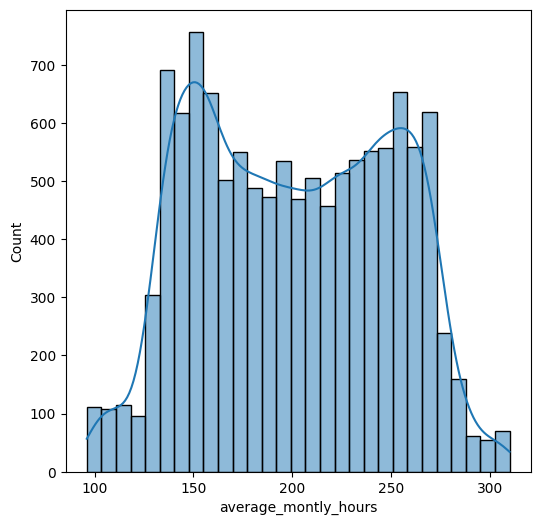

In [31]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = df['average_montly_hours'], kde=True)
plt.show()

In [32]:
#  Number of Projets that person has done
df['number_project'].value_counts()

number_project
4    3690
3    3525
5    2235
2    1583
6     828
7     145
Name: count, dtype: int64

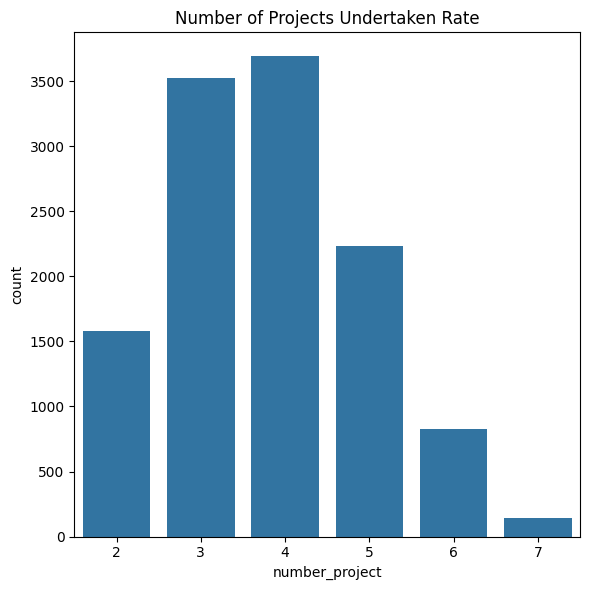

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="number_project")
plt.title("Number of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

In [36]:
# Promotion made in the last 5 years
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11803
1      203
Name: count, dtype: int64

This shows that most people didn't get promoted in the last five years only 203 people got promoted in the last five years.

* 1 => person got promoted 
* 0 => person was not promoted

In [39]:
labels = df['promotion_last_5years'].value_counts().index.tolist()
labels

[0, 1]

([<matplotlib.patches.Wedge at 0x1aba9ccb2c0>,
 [Text(-1.098448483042589, 0.058403168590715655, '0'),
  Text(1.0984484799667815, -0.05840322644056107, '1')],
 [Text(-0.5991537180232303, 0.03185627377675399, '98.31%'),
  Text(0.5991537163455172, -0.031856305331215126, '1.69%')])

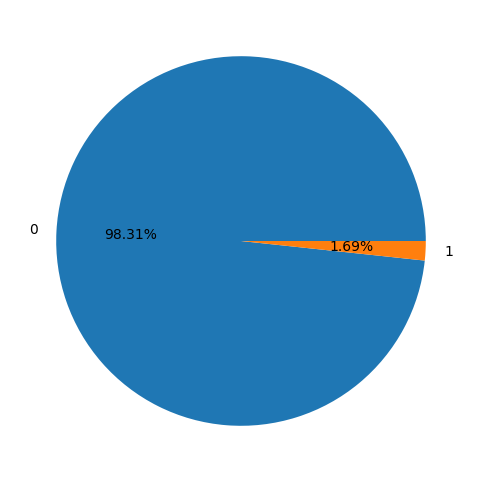

In [42]:
plt.figure(figsize=(6,6))
plt.pie(x=df['promotion_last_5years'].value_counts(),labels=labels, autopct='%1.2f%%')


In [45]:
labels = ['Promoted' if i==1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

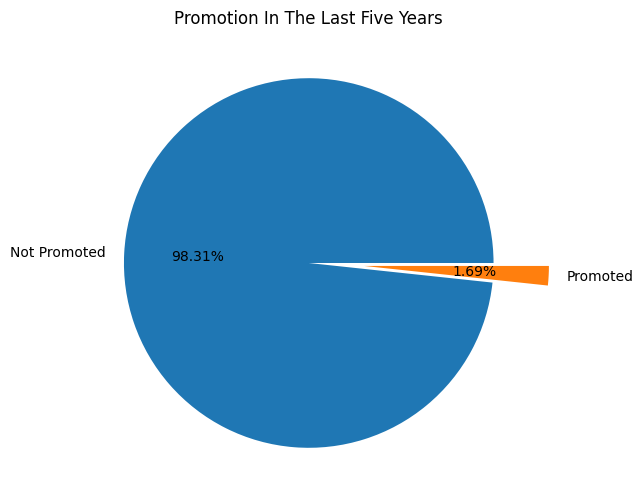

In [47]:
plt.figure(figsize=(6,6))
plt.pie(x=df['promotion_last_5years'].value_counts(),labels=labels, autopct='%1.2f%%', explode = [0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.show()

In [ ]:
# Work Accidents
df['Work_accident']